# Descriptive Statistics

## Summarise variables in detail
N.B. Variable name is case-sensitive<br>
Reveals 1, 5, 10, 25 (1Q), 50 (median), 75 (3Q), 90, 95, 99 percentiles values, the four smallest and four biggest values at the extremes, mean, SD, Variance, Skewness, and Kurtosis<br>
IQR = 3Q - 1Q

In [1]:
import os
os.chdir("/Applications/Stata/utilities")
from pystata import config
config.init("se")

import pandas as pd

Hospital = '/Users/mujiechen/Jupyter-Notebook/STATA/Datasets/HospAdmNeu.dta'
Babies = '/Users/mujiechen/Jupyter-Notebook/STATA/Datasets/Babies.dta'
Hospital = pd.read_stata(Hospital)
Babies = pd.read_stata(Babies)
print(Hospital.head())


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      StataNow 18.5
___/   /   /___/   /   /___/       SE—Standard Edition

 Statistics and Data Science       Copyright 1985-2023 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-782-8272        https://www.stata.com
                                   979-696-4600        service@stata.com

Stata license: Unlimited-user network, expiring  9 Sep 2025
Serial number: 501809305305
  Licensed to: Mujie
               

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. Maximum number of variables is set to 5,000 but can be increased;
          see help set_maxvar.
   Ordinary1213  Daycase1213  Total1213  Ordinary1314  Daycase1314  Total1314
0          2268         1213       3481          2585         1423       4008
1          1269         

In [2]:
%%stata -d Hospital

summ Ordinary1213, det

# Use tab var1, summ(var2) to produce summary for var1 split by var2


. 
. summ Ordinary1213, det

                        Ordinary1213
-------------------------------------------------------------
      Percentiles      Smallest
 1%          929            731
 5%         1300            924
10%         1612            929       Obs                 211
25%         2269            946       Sum of wgt.         211

50%         2895                      Mean           3399.441
                        Largest       Std. dev.      1858.054
75%         4013           9567
90%         5815           9635       Variance        3452364
95%         7365          10974       Skewness       1.843971
99%         9635          12958       Kurtosis       7.720899

. 
. # Use tab var1, summ(var2) to produce summary for var1 split by var2
Unknown #command
. 


Mild outliers (Inner Fence): 1.5 * IQR Below Q1 and above Q3<br>
Extreme outliers (Outer Fence): 3 * IQR Below Q1 and above Q3

## Produce Mean, SE, and 95% Confidence Interval

In [3]:
%%stata

ci means Ordinary1213


. 
. ci means Ordinary1213

    Variable |        Obs        Mean    Std. err.       [95% conf. interval]
-------------+---------------------------------------------------------------
Ordinary1213 |        211    3399.441    127.9137        3147.281      3651.6

. 


# Graphing Data
With an eye towards modelling
## Histogram
Histogram with number of bins specified (14 by default), with a specific start bin, and checked for normality

In [4]:
print(Babies.head())

   id   bwt  gest  mat_age  cigs
0   1  2100    32       41     0
1   2  3600    33       15     0
2   3  2360    33       18     0
3   4  2466    33       16     0
4   5  3840    34       28     0



. 
. clear

. use Babies

. 
. hist bwt, bin(20) normal
(bin=20, start=1503, width=168.6)

. hist bwt, start(0) width(500) normal
(bin=10, start=0, width=500)

. 


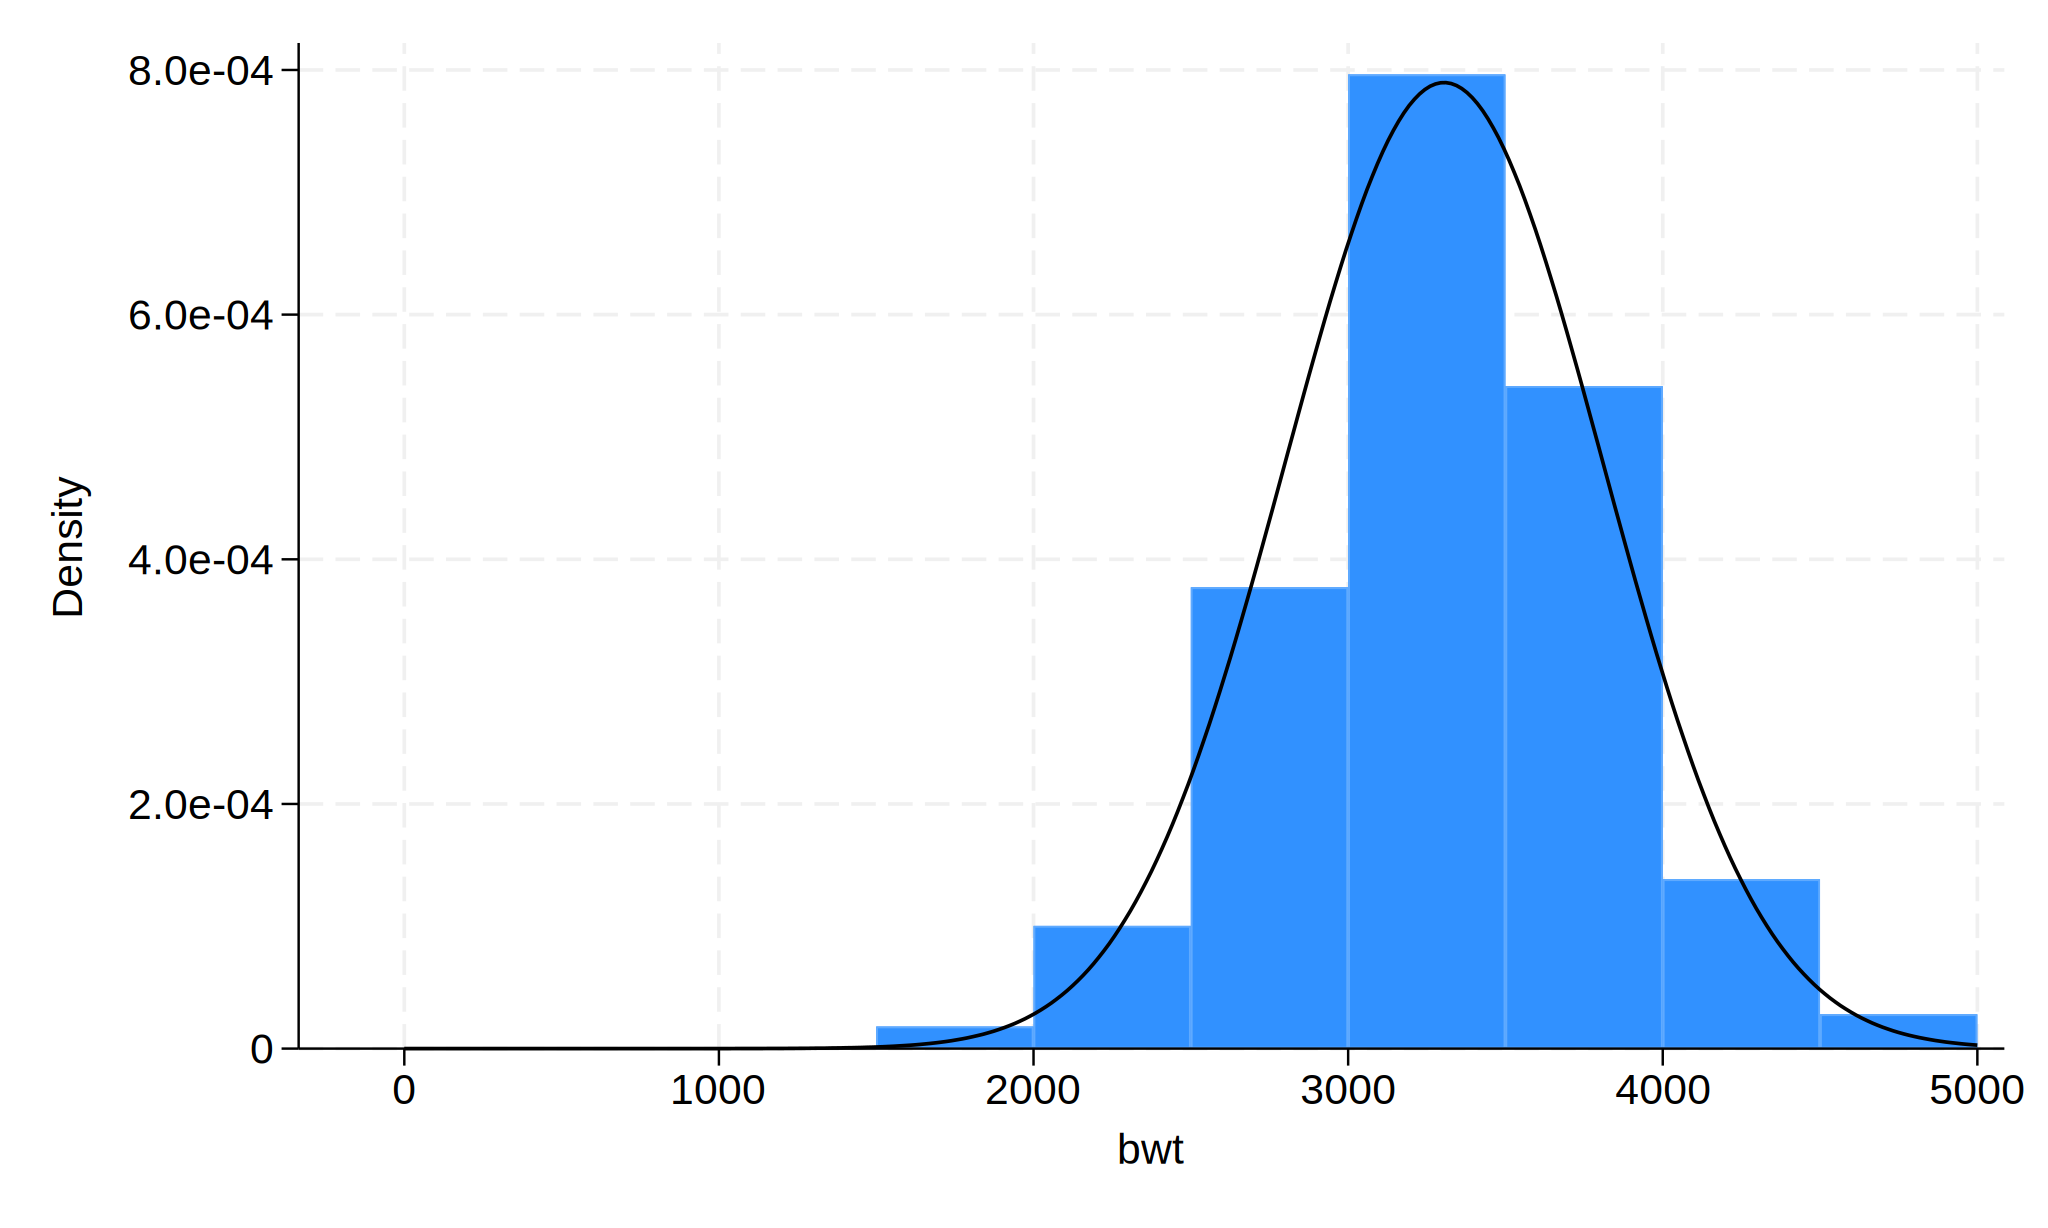

In [5]:
%%stata

clear
use Babies

hist bwt, bin(20) normal
hist bwt, start(0) width(500) normal

N.B. Look for a bell-shape here to determine whether the data follows a normal distribution

## Quantile-Quantile (QQ) Plot


. 
. qnorm bwt

. 


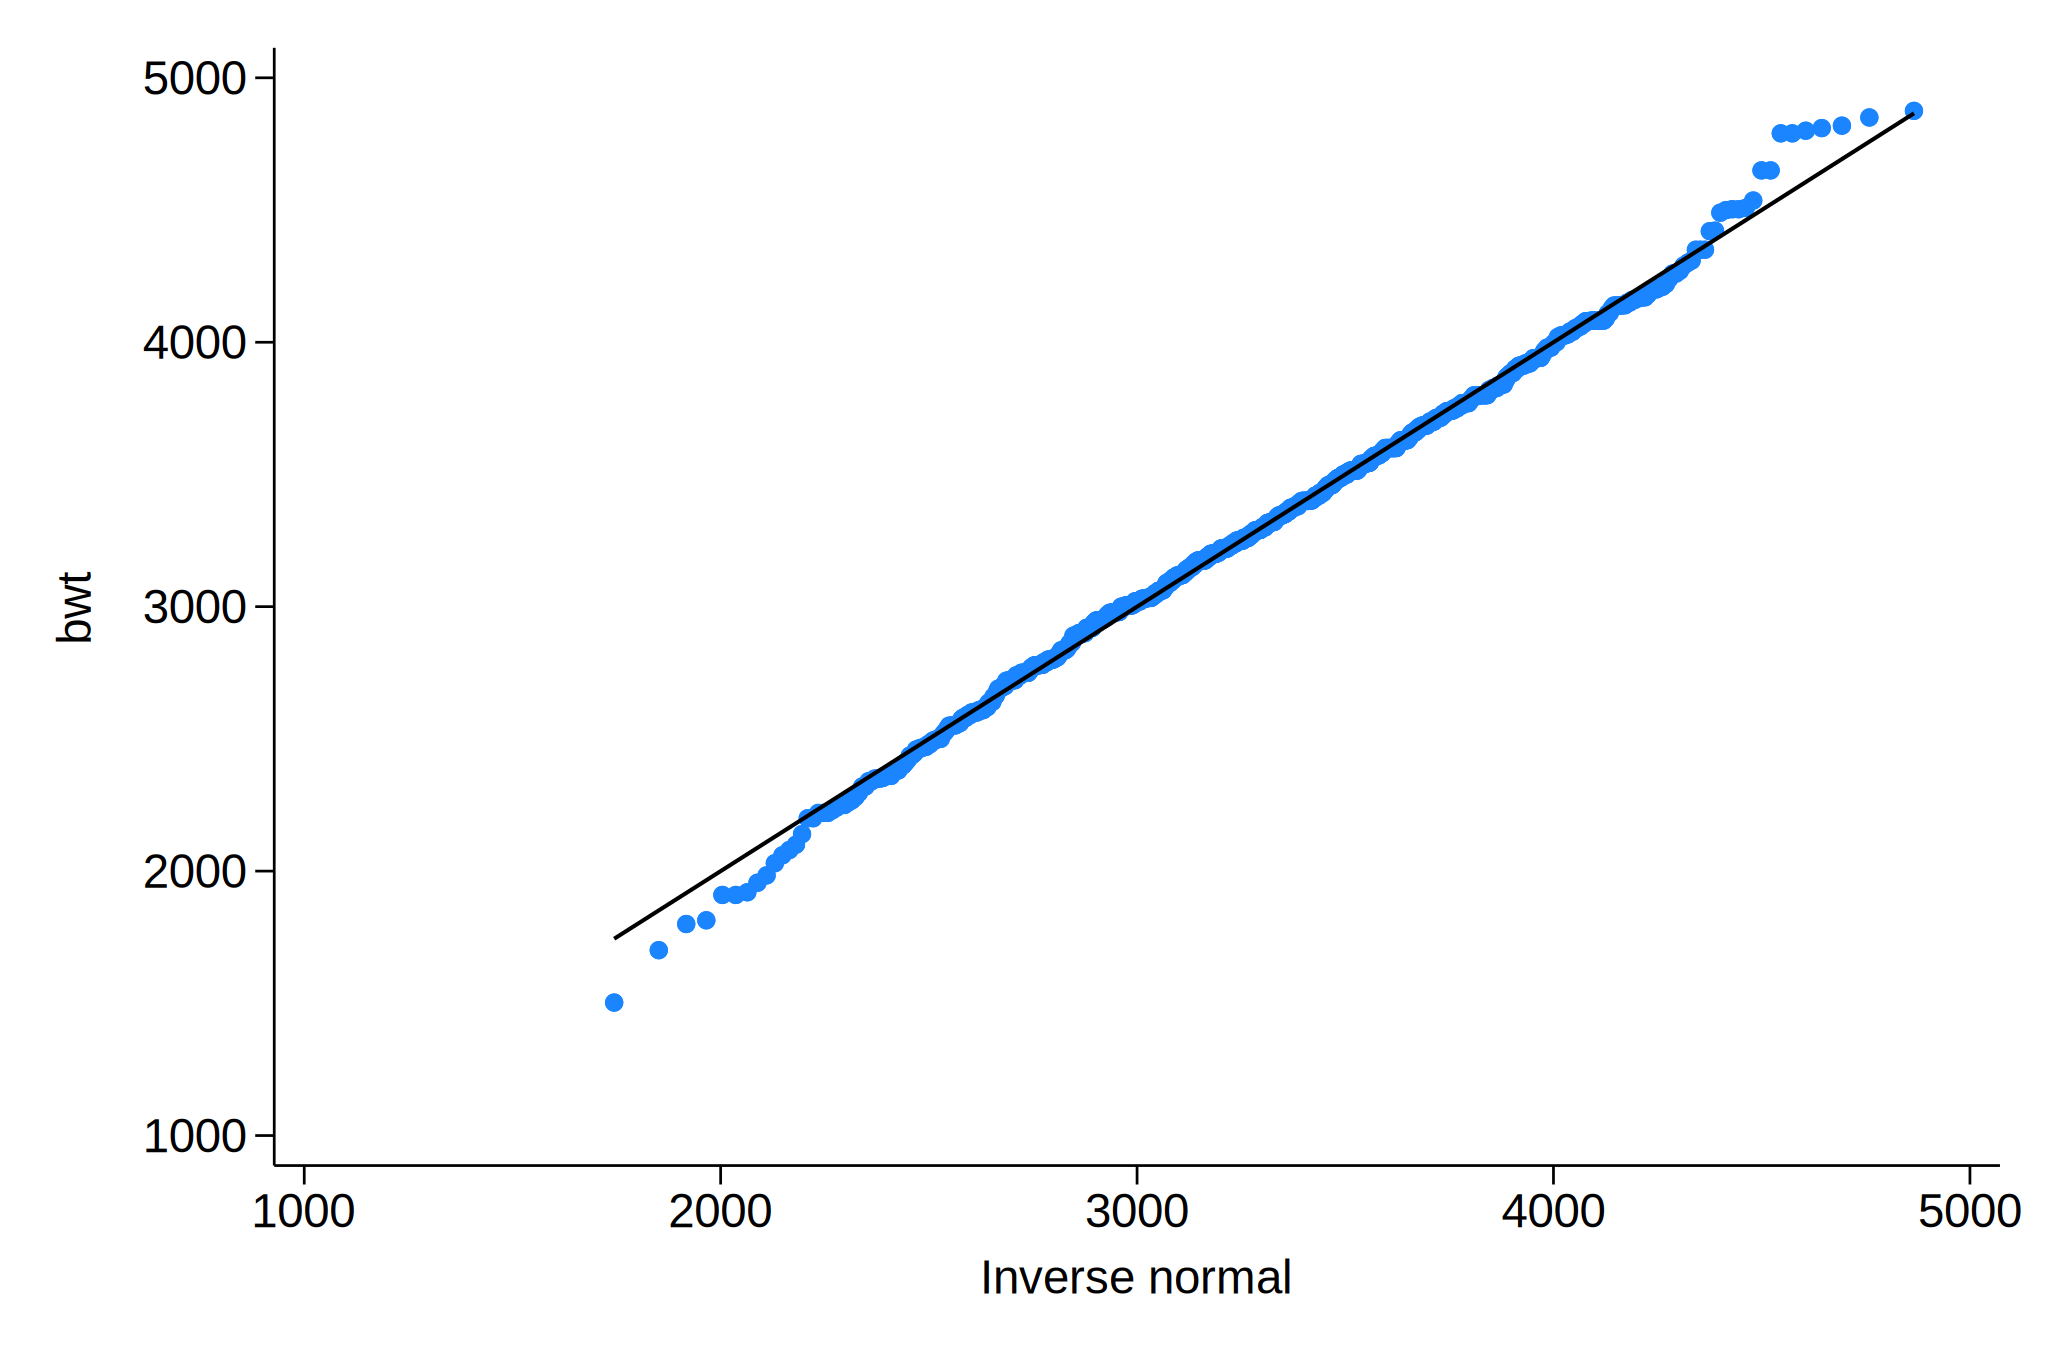

In [6]:
%%stata

qnorm bwt

By default, the y-axis is density. Switch to frequency by appending "freq" as an argument<br>
N.B. If a majority of the points are on the reference line of perfect fit, then the data is normally distributed

## Scatter Plot


. 
. clear

. sysuse auto
(1978 automobile data)

. 
. twoway (scatter length weight)

. 


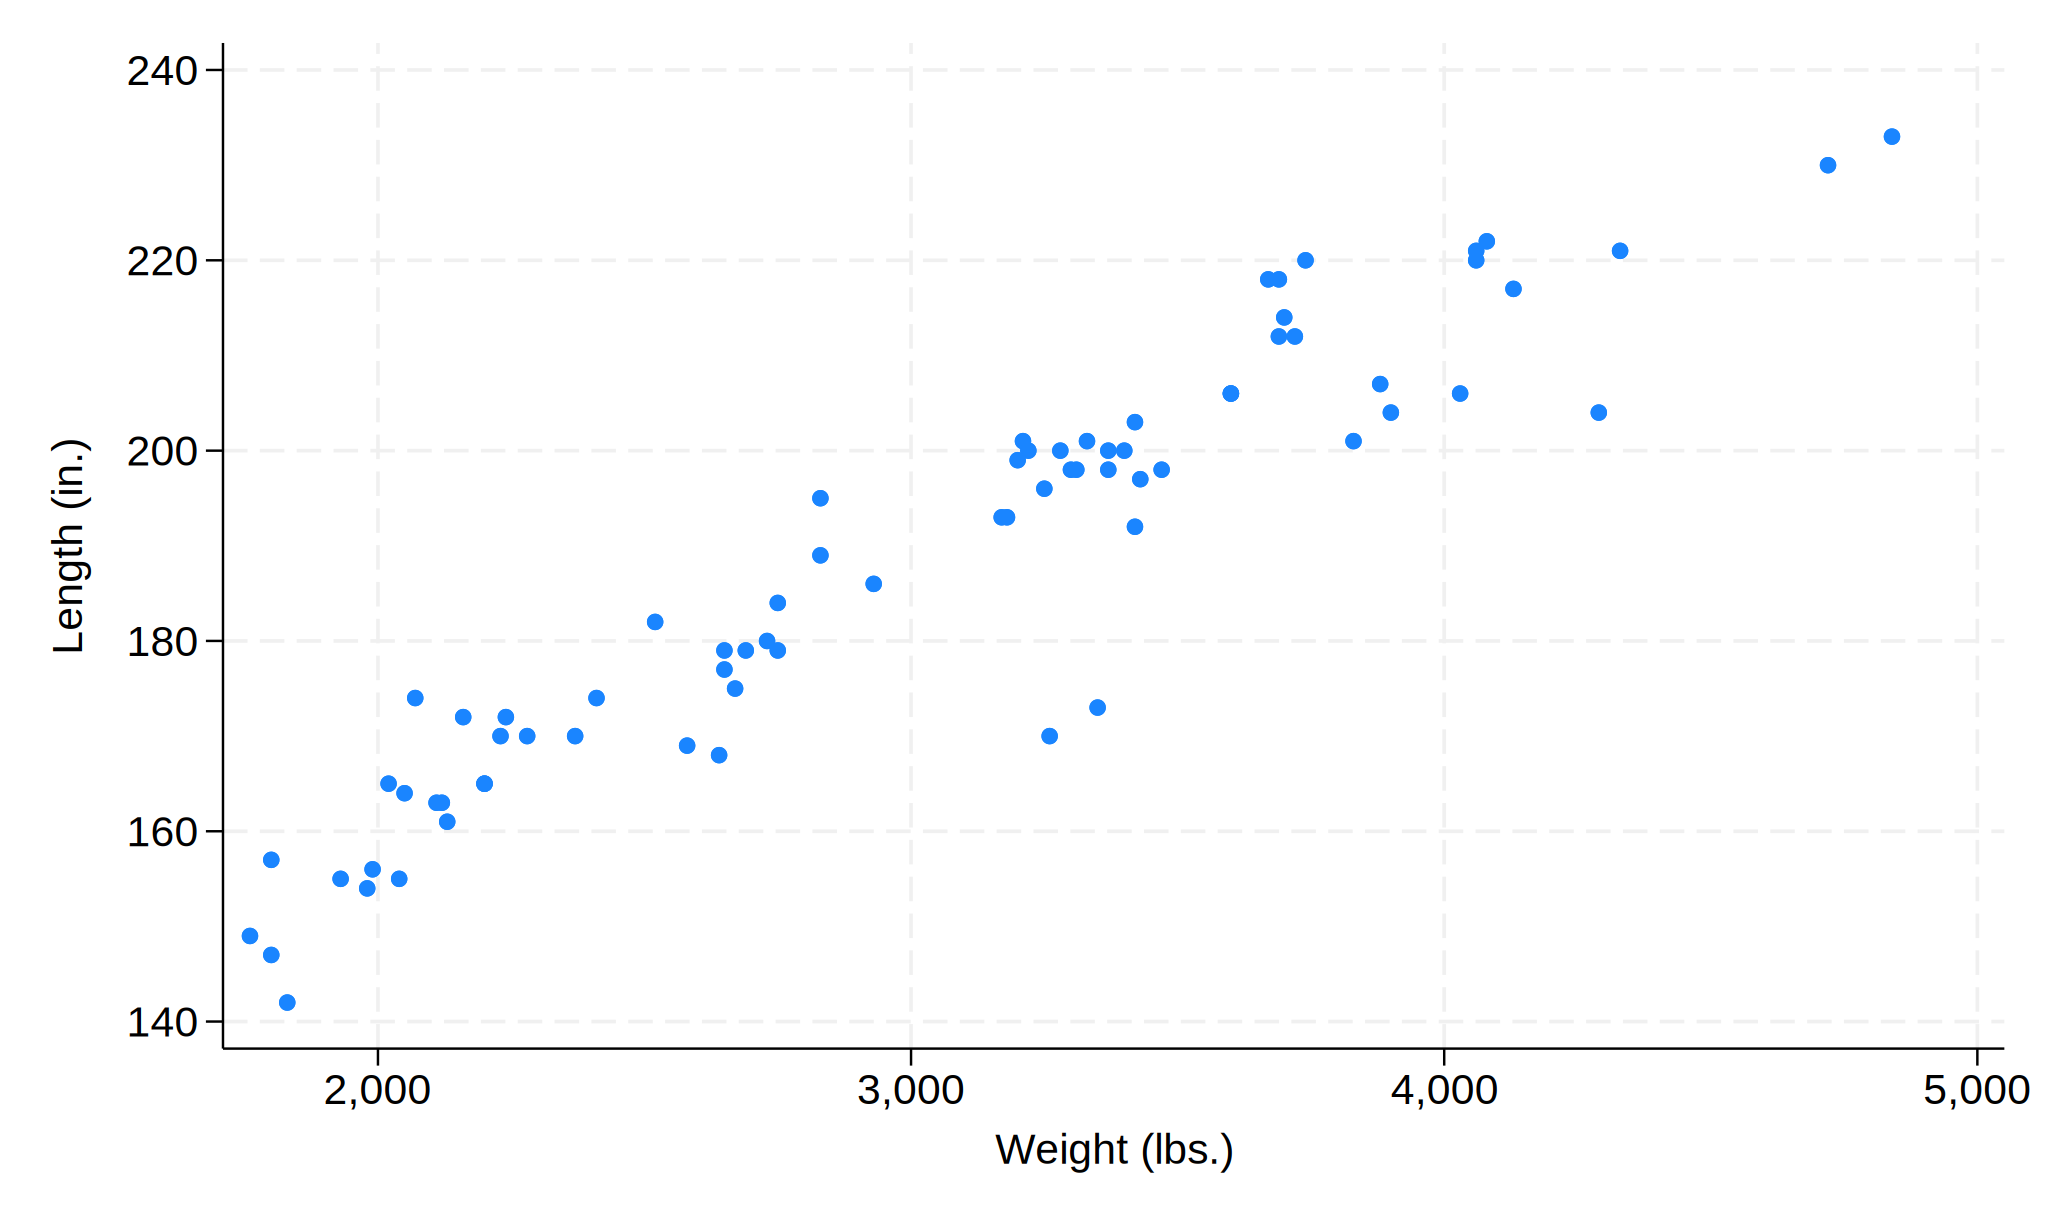

In [7]:
%%stata

clear
sysuse auto

twoway (scatter length weight)


. 
. twoway (scatter price mpg), by(foreign, total)

. 


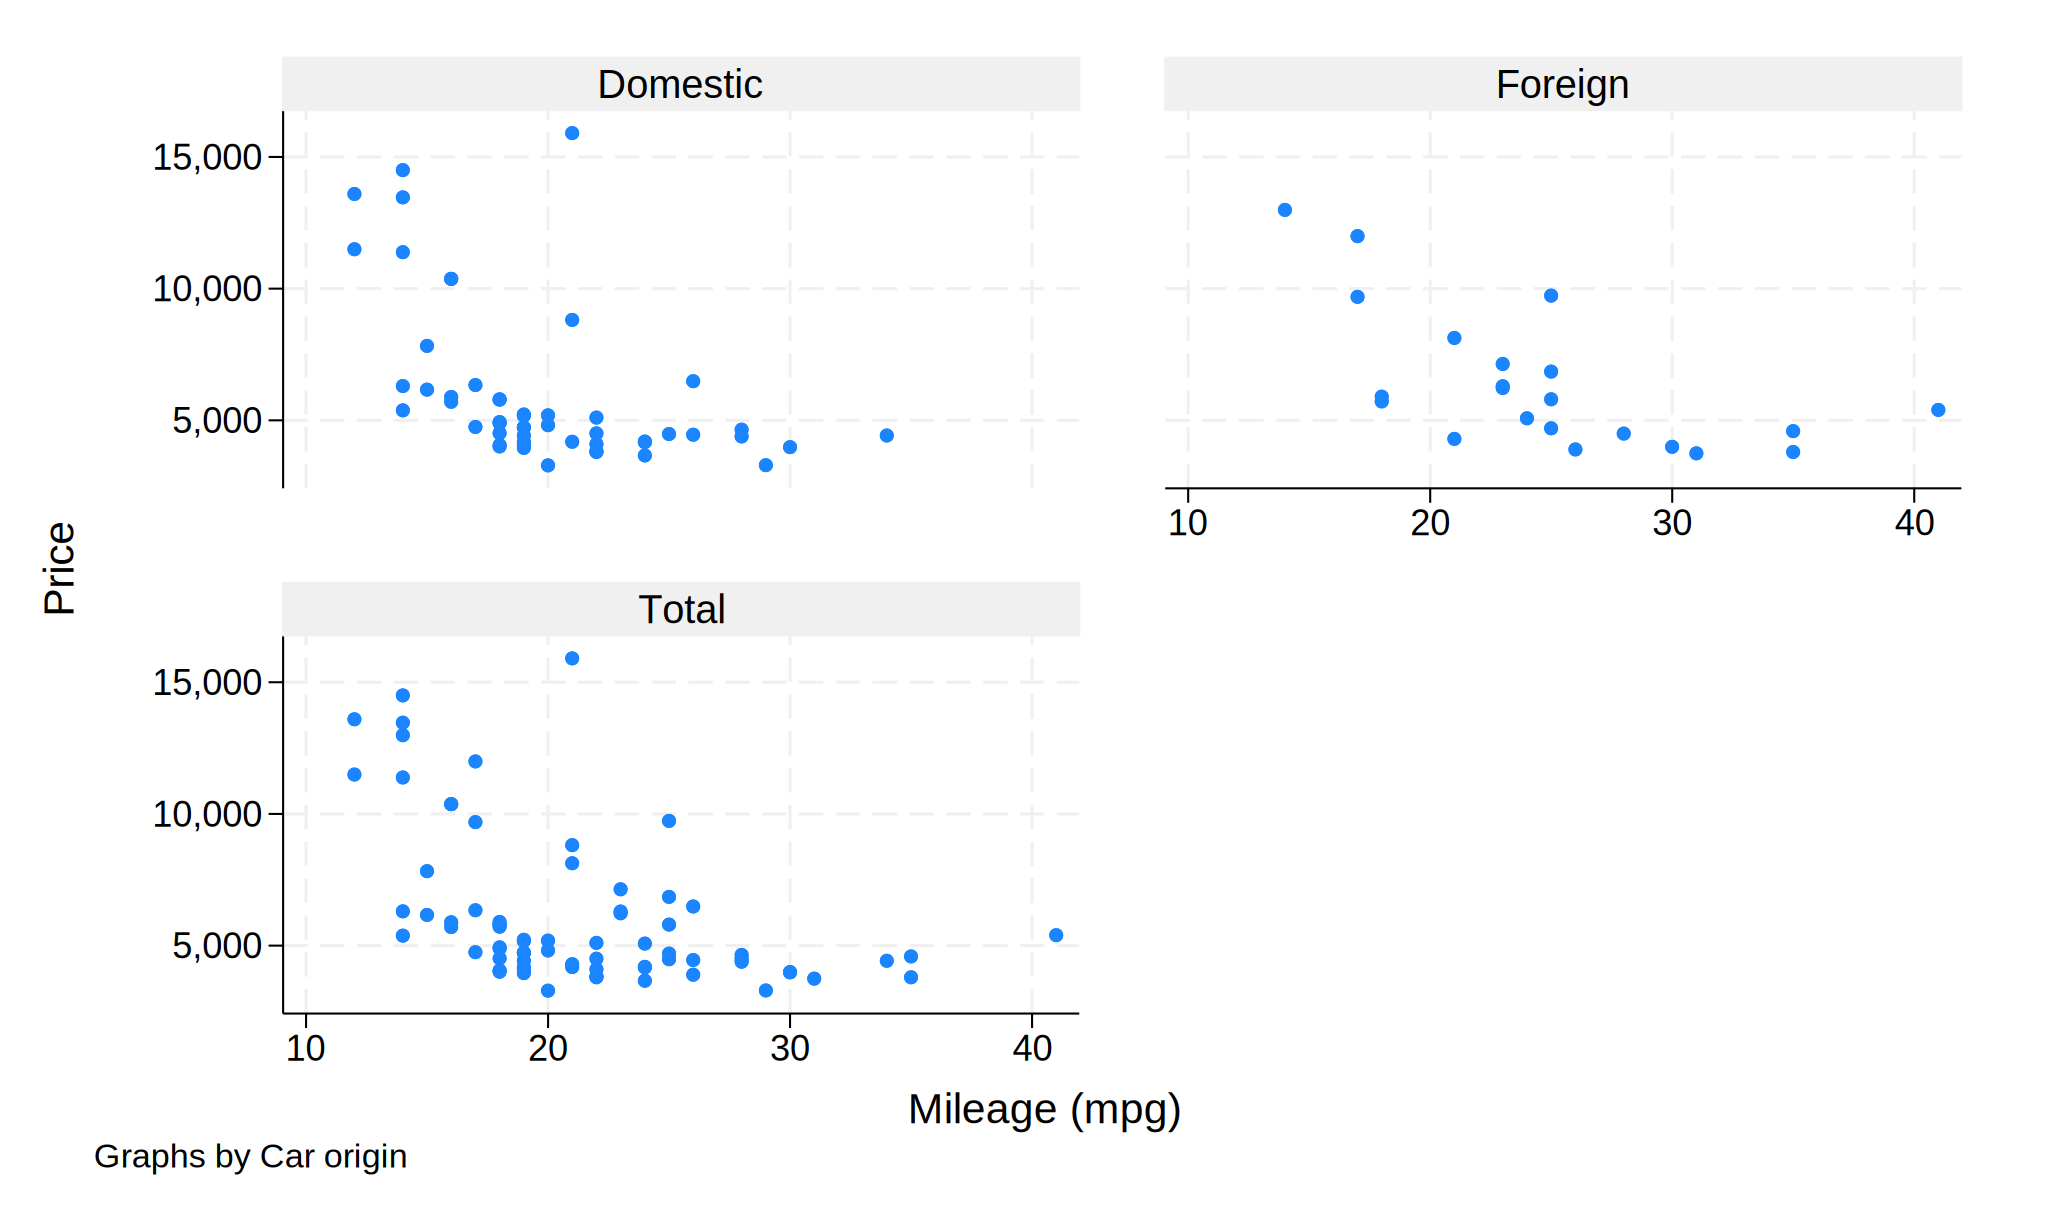

In [8]:
%%stata

twoway (scatter price mpg), by(foreign, total)


. 
. twoway (scatter price mpg), by(foreign)

. 


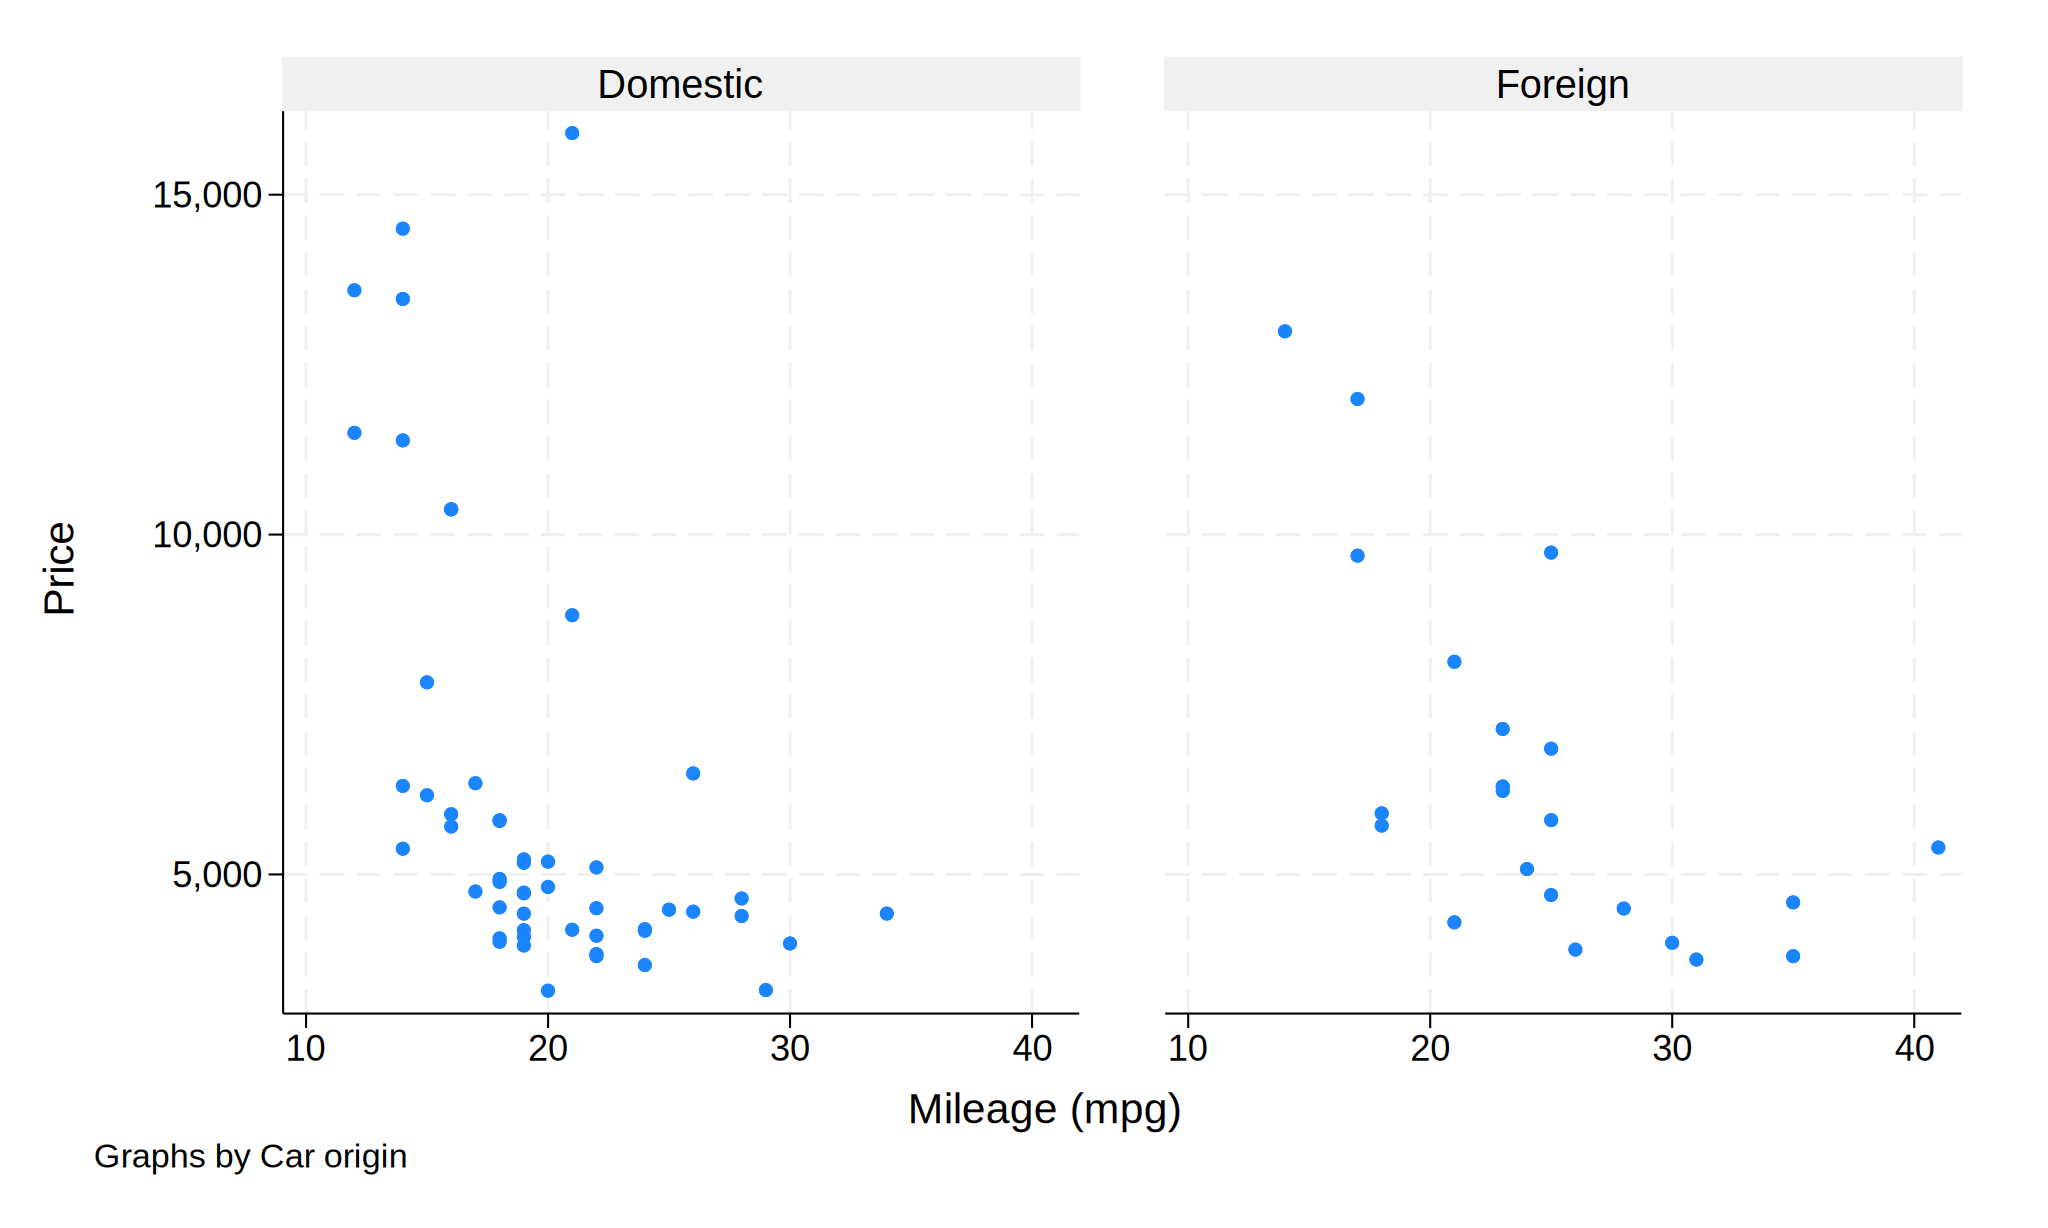

In [9]:
%%stata

twoway (scatter price mpg), by(foreign)

## Overlaying Predicted Line Over Plot


. 
. regress price mpg

      Source |       SS           df       MS      Number of obs   =        74
-------------+----------------------------------   F(1, 72)        =     20.26
       Model |   139449474         1   139449474   Prob > F        =    0.0000
    Residual |   495615923        72  6883554.48   R-squared       =    0.2196
-------------+----------------------------------   Adj R-squared   =    0.2087
       Total |   635065396        73  8699525.97   Root MSE        =    2623.7

------------------------------------------------------------------------------
       price | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         mpg |  -238.8943   53.07669    -4.50   0.000    -344.7008   -133.0879
       _cons |   11253.06   1170.813     9.61   0.000     8919.088    13587.03
------------------------------------------------------------------------------

. predict pricehat
(optio

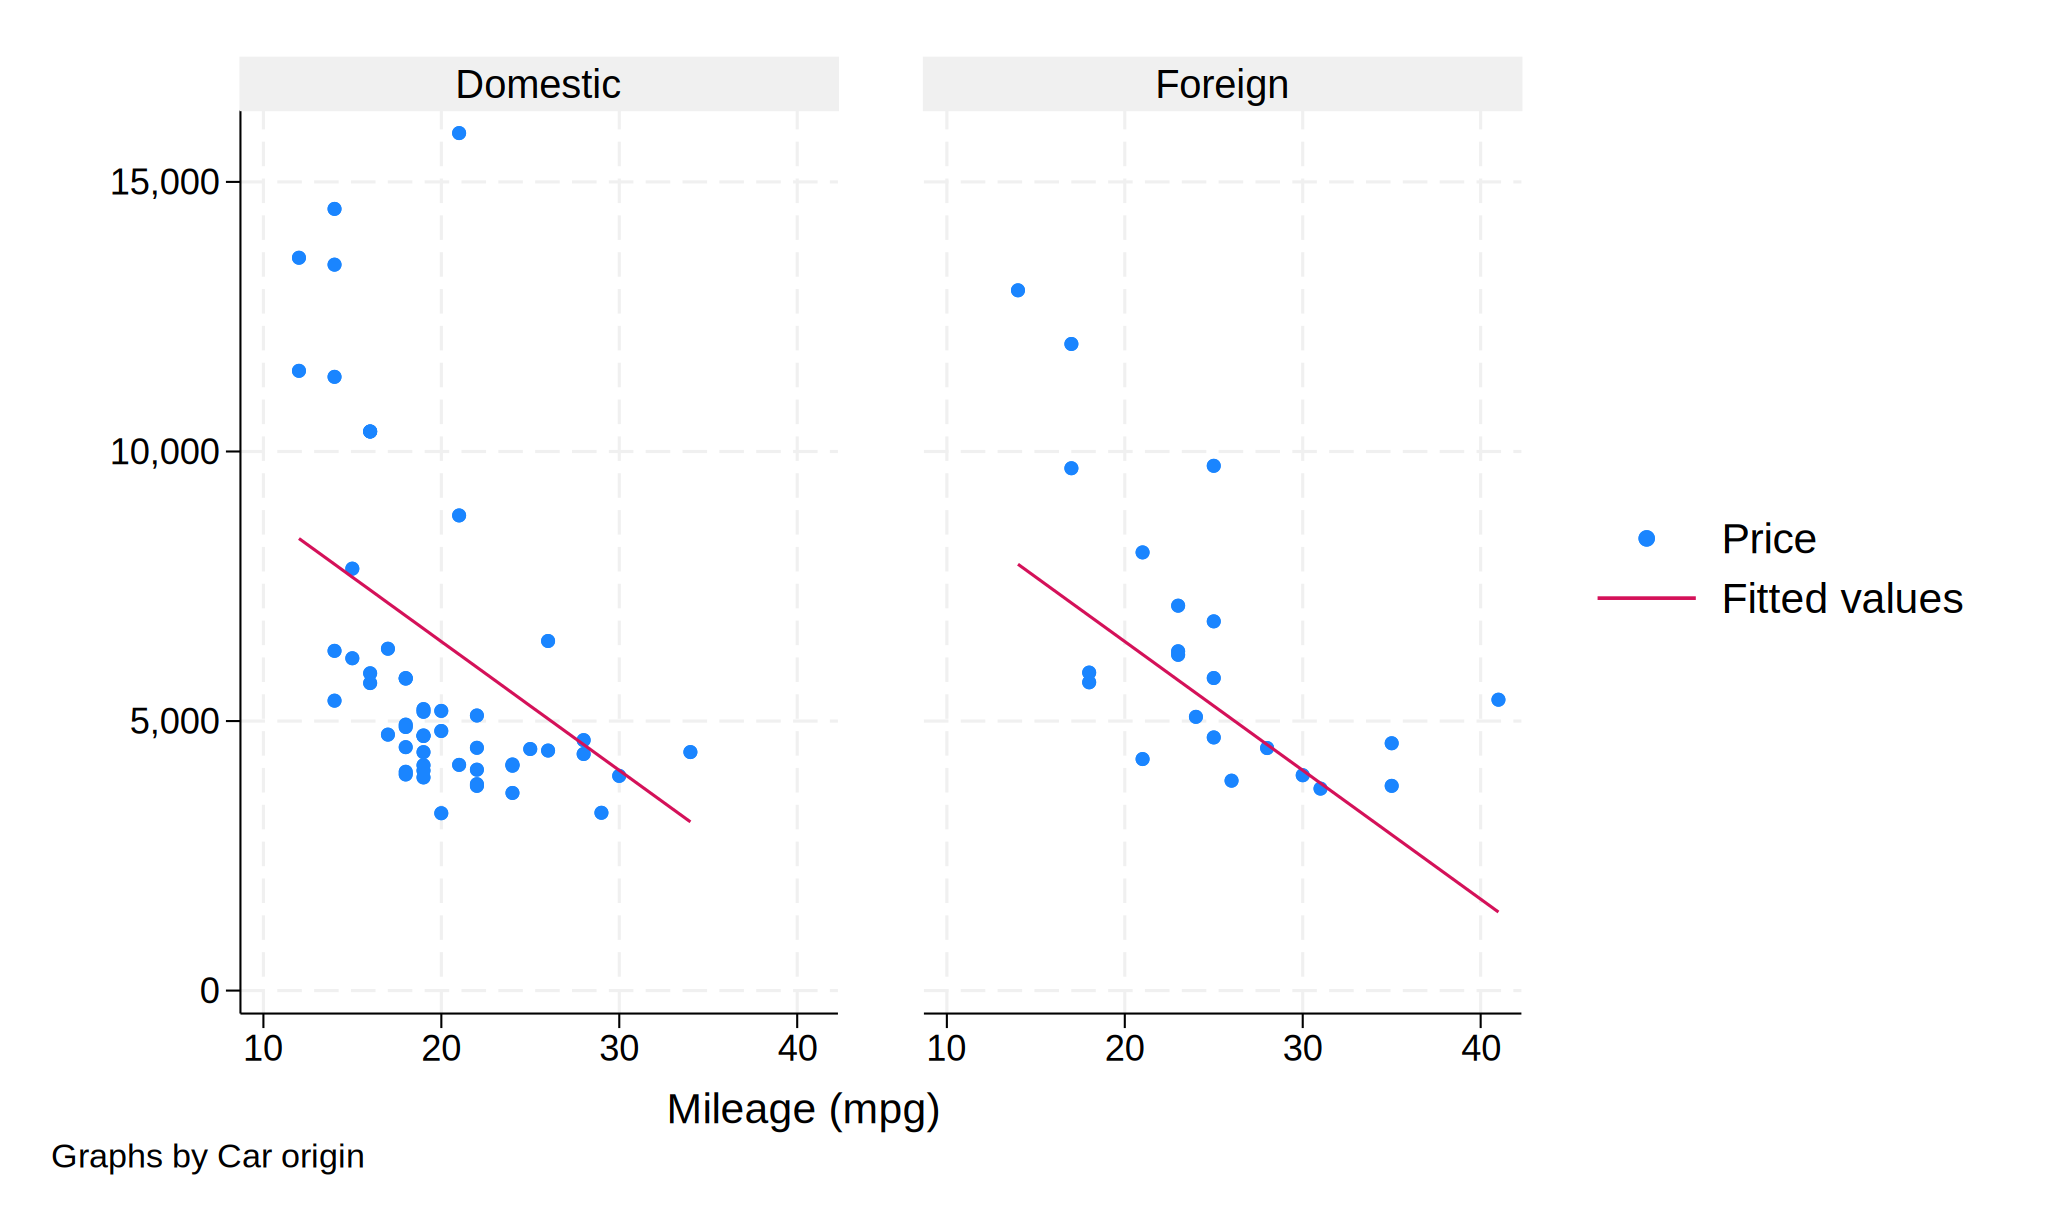

In [10]:
%%stata

regress price mpg
predict pricehat

twoway (scatter price mpg) (line pricehat mpg, sort), by(foreign)

## Box Plot


. 
. graph box price

. 


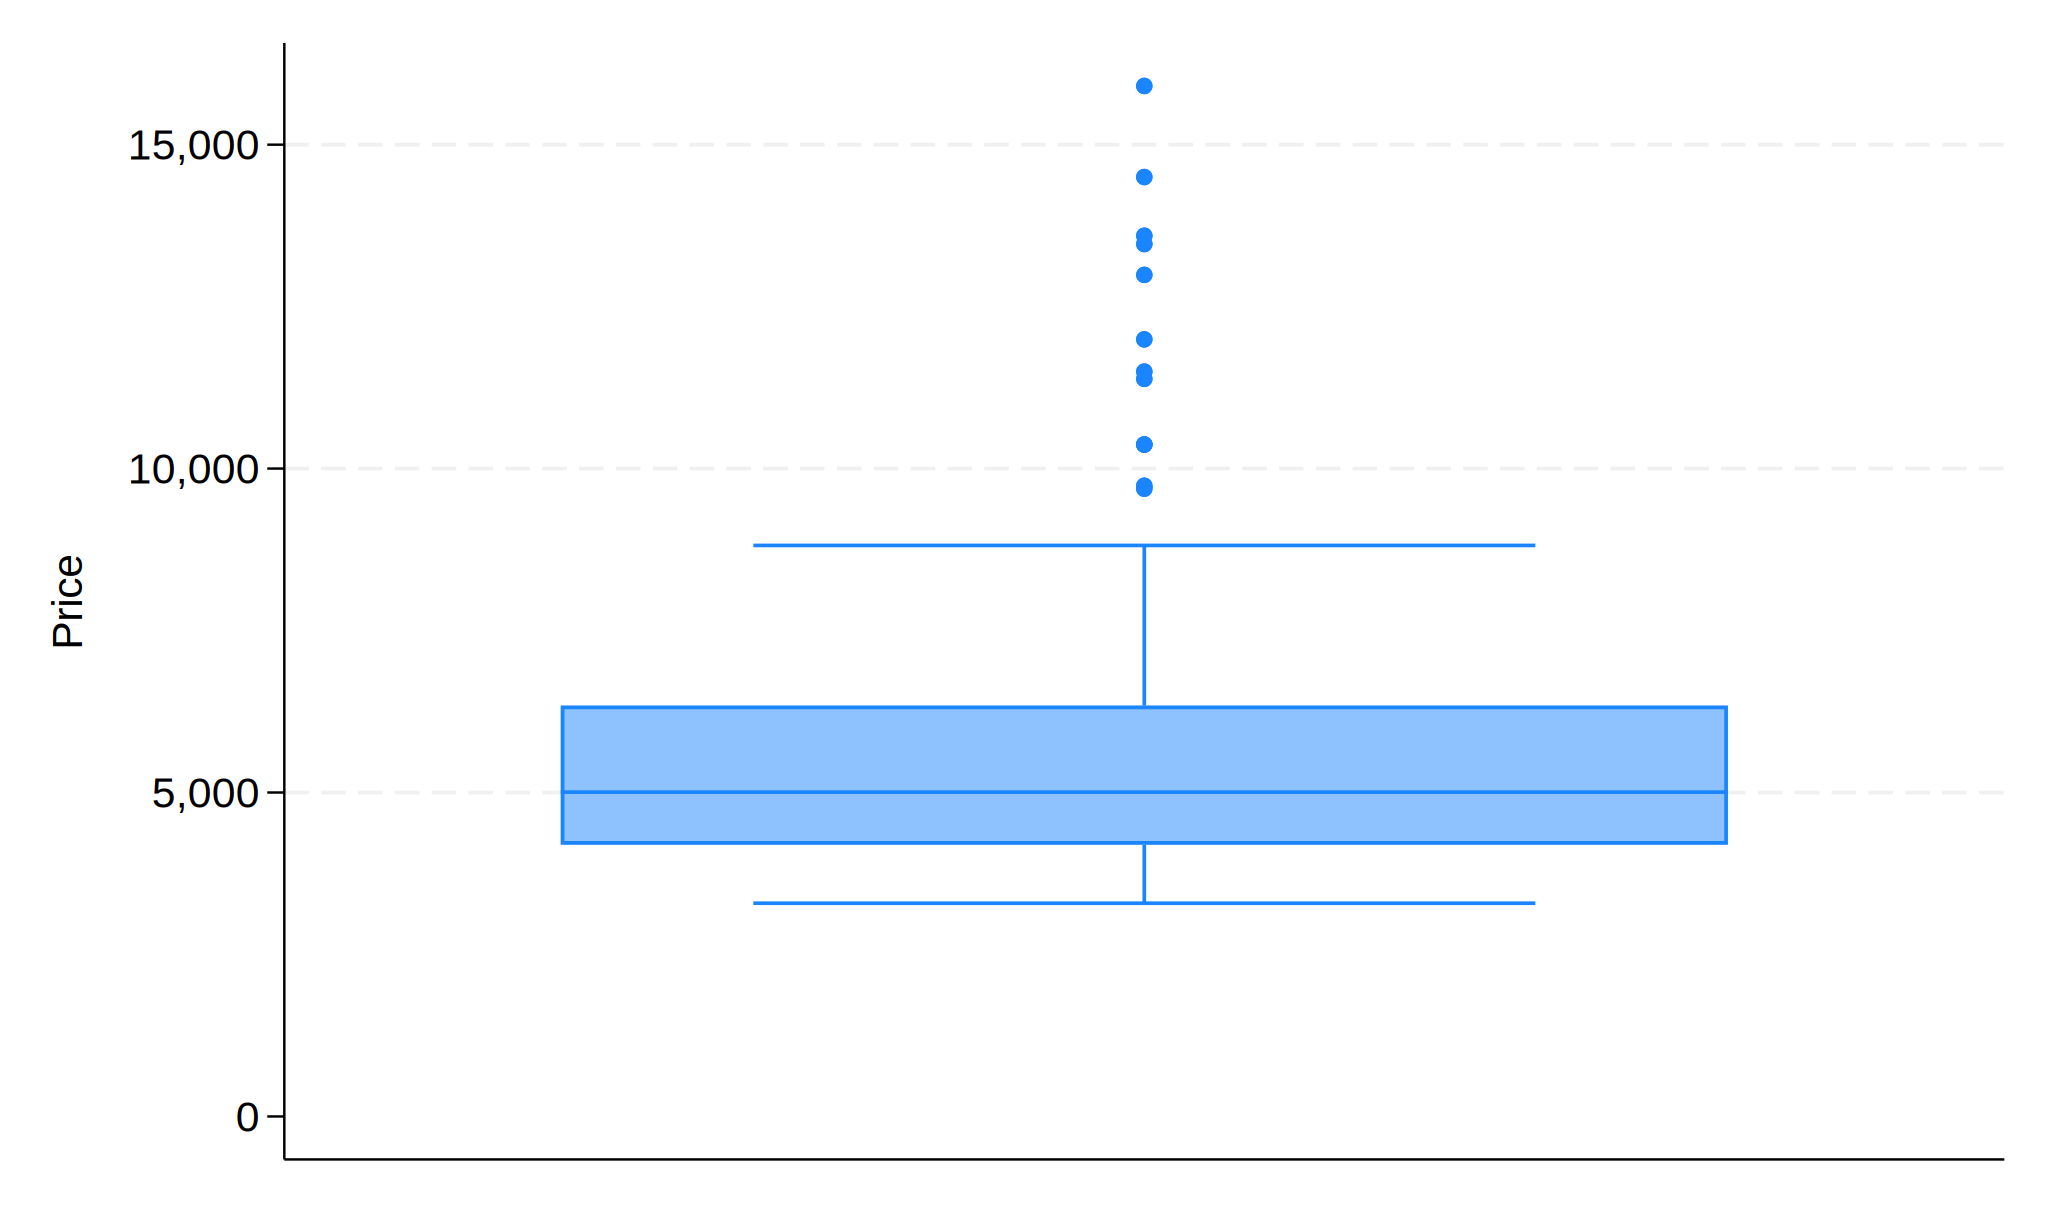

In [11]:
%%stata

graph box price

Edges of the box represent 25 and 75th perecentiles<br>
Whiskers of the box plot represent the smallest and lowest values within the inner fence<br>
Data beyond whiskers are in the outer fence and are considered outliers